In [16]:
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt

In [21]:
def save_data_to_csv(stock_key):
    url  = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={stock_key}&outputsize=full&apikey=demo'
    data = requests.get(url).json()

    file = open(f'{stock_key}.csv', 'w', newline='')
    csv_w = csv.writer(file)
    csv_w.writerow(['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend_amount', 'split_coefficient'])

    for i in data['Time Series (Daily)']:
        csv_w.writerow([i, data['Time Series (Daily)'][i]['1. open'], data['Time Series (Daily)'][i]['2. high'], data['Time Series (Daily)'][i]['3. low'], data['Time Series (Daily)'][i]['4. close'], data['Time Series (Daily)'][i]['5. adjusted close'], data['Time Series (Daily)'][i]['6. volume'], data['Time Series (Daily)'][i]['7. dividend amount'], data['Time Series (Daily)'][i]['8. split coefficient']])

    

In [12]:
save_data_to_csv('IBM')

In [13]:
df = pd.read_csv('IBM.csv')
df.head()

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2023-06-23,130.40,130.620,129.18,129.43,129.43,11324705,0.0,1.0
1,2023-06-22,131.68,132.960,130.68,131.17,131.17,6013021,0.0,1.0
2,2023-06-21,135.11,135.390,133.29,133.69,133.69,5501272,0.0,1.0
3,2023-06-20,136.36,137.230,135.89,135.96,135.96,4272511,0.0,1.0
4,2023-06-16,139.23,139.469,137.47,137.48,137.48,7473676,0.0,1.0


In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               5949 non-null   datetime64[ns]
 1   open               5949 non-null   float64       
 2   high               5949 non-null   float64       
 3   low                5949 non-null   float64       
 4   close              5949 non-null   float64       
 5   adjusted_close     5949 non-null   float64       
 6   volume             5949 non-null   int64         
 7   dividend_amount    5949 non-null   float64       
 8   split_coefficient  5949 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 418.4 KB


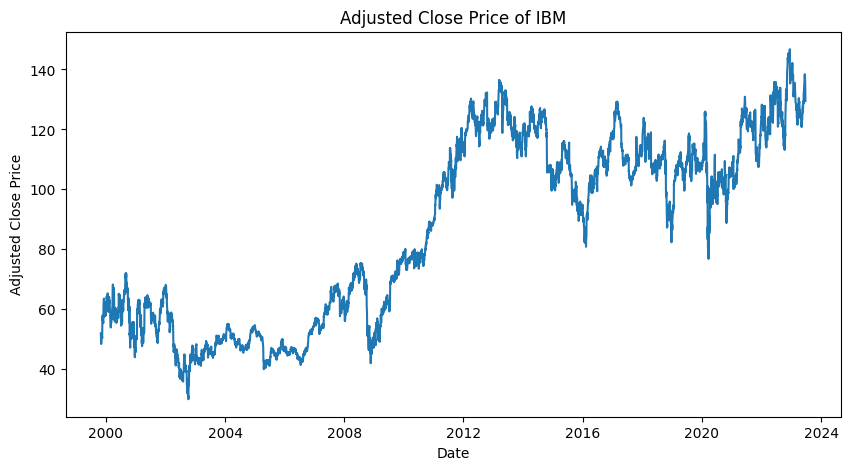

In [20]:
# Plot the adjusted close price with date as x axis
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['adjusted_close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price of IBM')
plt.show()

In [22]:
save_data_to_csv('VEDL.BSE')

In [23]:
df1 = pd.read_csv('VEDL.BSE.csv')
df1['date'] = pd.to_datetime(df1['date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               4551 non-null   datetime64[ns]
 1   open               4551 non-null   float64       
 2   high               4551 non-null   float64       
 3   low                4551 non-null   float64       
 4   close              4551 non-null   float64       
 5   adjusted_close     4551 non-null   float64       
 6   volume             4551 non-null   int64         
 7   dividend_amount    4551 non-null   float64       
 8   split_coefficient  4551 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 320.1 KB


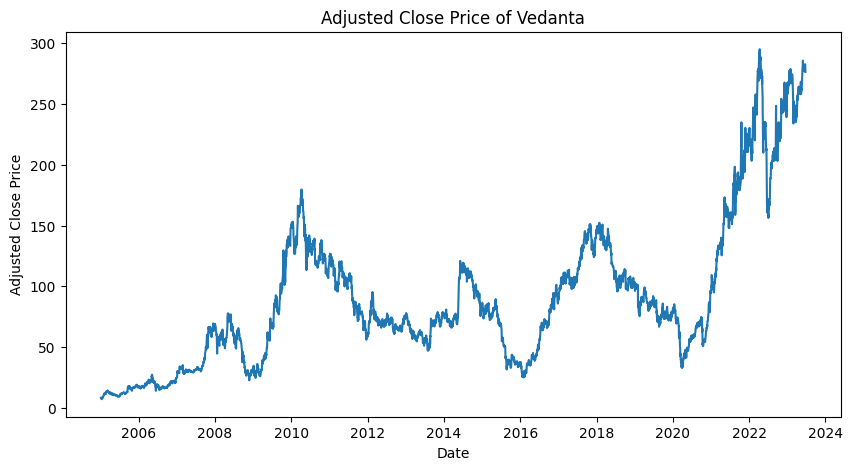

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df1['date'], df1['adjusted_close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price of Vedanta')
plt.show()

In [28]:
def divide_data(data):
    # Dividing the data into train and test into 80:20 ratio
    train = data[int(0.8*(len(data))):]
    test = data[:int(0.8*(len(data)))]

    # Saving as CSV files
    train.to_csv('train.csv', index=False)
    test.to_csv('test.csv', index=False)

In [29]:
divide_data(df1)

In [31]:
def get_data(stock_key):
    url  = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={stock_key}&outputsize=full&apikey=demo'
    data = requests.get(url).json()

    file = open(f'{stock_key}.csv', 'w', newline='')
    csv_w = csv.writer(file)
    csv_w.writerow(['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend_amount', 'split_coefficient'])

    for i in data['Time Series (Daily)']:
        csv_w.writerow([i, data['Time Series (Daily)'][i]['1. open'], data['Time Series (Daily)'][i]['2. high'], data['Time Series (Daily)'][i]['3. low'], data['Time Series (Daily)'][i]['4. close'], data['Time Series (Daily)'][i]['5. adjusted close'], data['Time Series (Daily)'][i]['6. volume'], data['Time Series (Daily)'][i]['7. dividend amount'], data['Time Series (Daily)'][i]['8. split coefficient']])
    file.close()

    df = pd.read_csv(f'{stock_key}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    train = df[int(0.8*(len(df))):]
    test = df[:int(0.8*(len(df)))]

    train.to_csv(f'{stock_key}_train.csv', index=False)
    test.to_csv(f'{stock_key}_test.csv', index=False)
    

In [32]:
get_data('AAPL')